In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logistic_reg

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [14]:
# Data
df = pd.read_csv("framingham.csv", usecols=['age', 'sysBP', 'prevalentStroke', 'diaBP','glucose', 'diabetes', 'TenYearCHD'])
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

age                0
prevalentStroke    0
diabetes           0
sysBP              0
diaBP              0
glucose            0
TenYearCHD         0
dtype: int64

In [16]:
df.corrwith(df.TenYearCHD).abs().sort_values(ascending=False)

TenYearCHD         1.000000
age                0.235210
sysBP              0.222301
diaBP              0.146438
glucose            0.125544
diabetes           0.096241
prevalentStroke    0.066665
dtype: float64

In [18]:
df.shape

(3850, 7)

In [40]:
# Test vs Train
np.random.seed(30)
x = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
# Divide by index
x_index = np.random.choice(x.index, size=3000)
x_train = x.loc[x_index, :]
y_train = y.loc[x_index]

# Test
y_index = np.random.choice(y.index, size=850)
x_test = x.loc[y_index, :]
y_test = y.loc[y_index]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3000, 6), (3000,), (850, 6), (850,))

In [76]:
# Logistic Regression
w_init = np.zeros_like(x_train.iloc[0].values)
b_init = 0
w,b = logistic_reg.gradient_descent(x_train.values, y_train.values, w_init, b_init, 0.0001, 10000)
w,b

Iteration    0: Cost 0.45994303785654106
Iteration 1000: Cost 0.4294635952014137
Iteration 2000: Cost 0.42700849250178075
Iteration 3000: Cost 0.4264995704510858
Iteration 4000: Cost 0.42638468850593686
Iteration 5000: Cost 0.42634829239977967
Iteration 6000: Cost 0.4263274999706829
Iteration 7000: Cost 0.4263098139318781
Iteration 8000: Cost 0.4262927504707635
Iteration 9000: Cost 0.4262758158223177


(array([ 0.00297178,  0.00218966,  0.00257456,  0.02431477, -0.05569532,
        -0.00567042]),
 -0.013074245015265173)

In [84]:
# Prediction and accuracy
y_pred = logistic_reg.predict(x_test.values, w, b)
logistic_reg.accuracy(y_test.values, y_pred)

'85.65%'

In [91]:
# Logistic Regression with sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [92]:
y_pred = log_reg.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.851764705882353
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       726
           1       0.43      0.05      0.09       124

    accuracy                           0.85       850
   macro avg       0.64      0.52      0.50       850
weighted avg       0.80      0.85      0.80       850



In [103]:
# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=24) # k

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=24)

In [104]:
y_pred_knn = knn.predict(x_test)

In [105]:
# Report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       726
           1       0.70      0.06      0.10       124

    accuracy                           0.86       850
   macro avg       0.78      0.53      0.51       850
weighted avg       0.84      0.86      0.80       850



In [109]:
# with Grid Search knn 
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,30)}
knn_gcsv = GridSearchCV(knn, param_grid, cv=5)
knn_gcsv.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [110]:
knn_gcsv.best_params_

{'n_neighbors': 24}

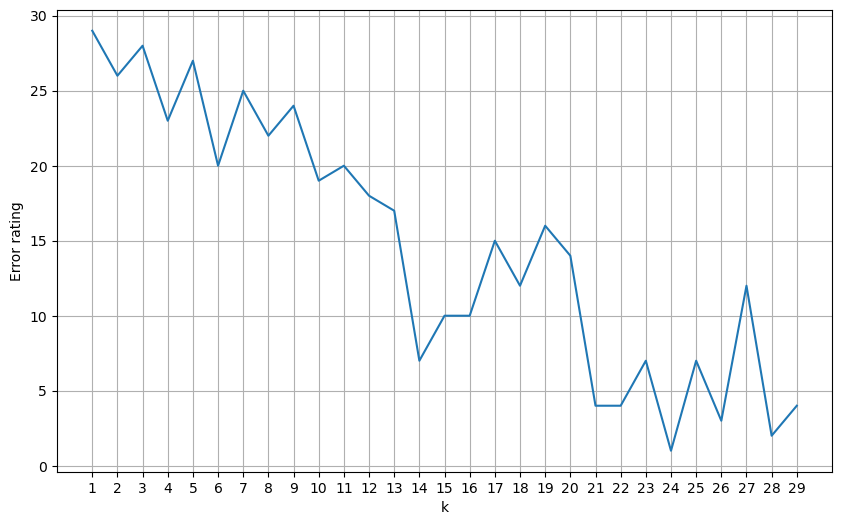

In [112]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gcsv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Error rating")
plt.grid()
plt.show()

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       726
           1       0.65      0.72      0.68       124

    accuracy                           0.90       850
   macro avg       0.80      0.83      0.81       850
weighted avg       0.91      0.90      0.91       850

Model accuracy:  0.9035294117647059


<Axes: >

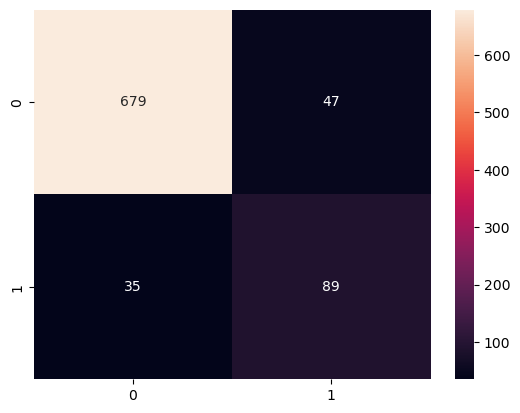

In [120]:
# Decision Tree
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

# Evaluate model
y_pred_tree = tree.predict(x_test)
print(classification_report(y_test, y_pred_tree))
print("Model accuracy: ", accuracy_score(y_test, y_pred_tree))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(conf_mat, annot=True, fmt='g')

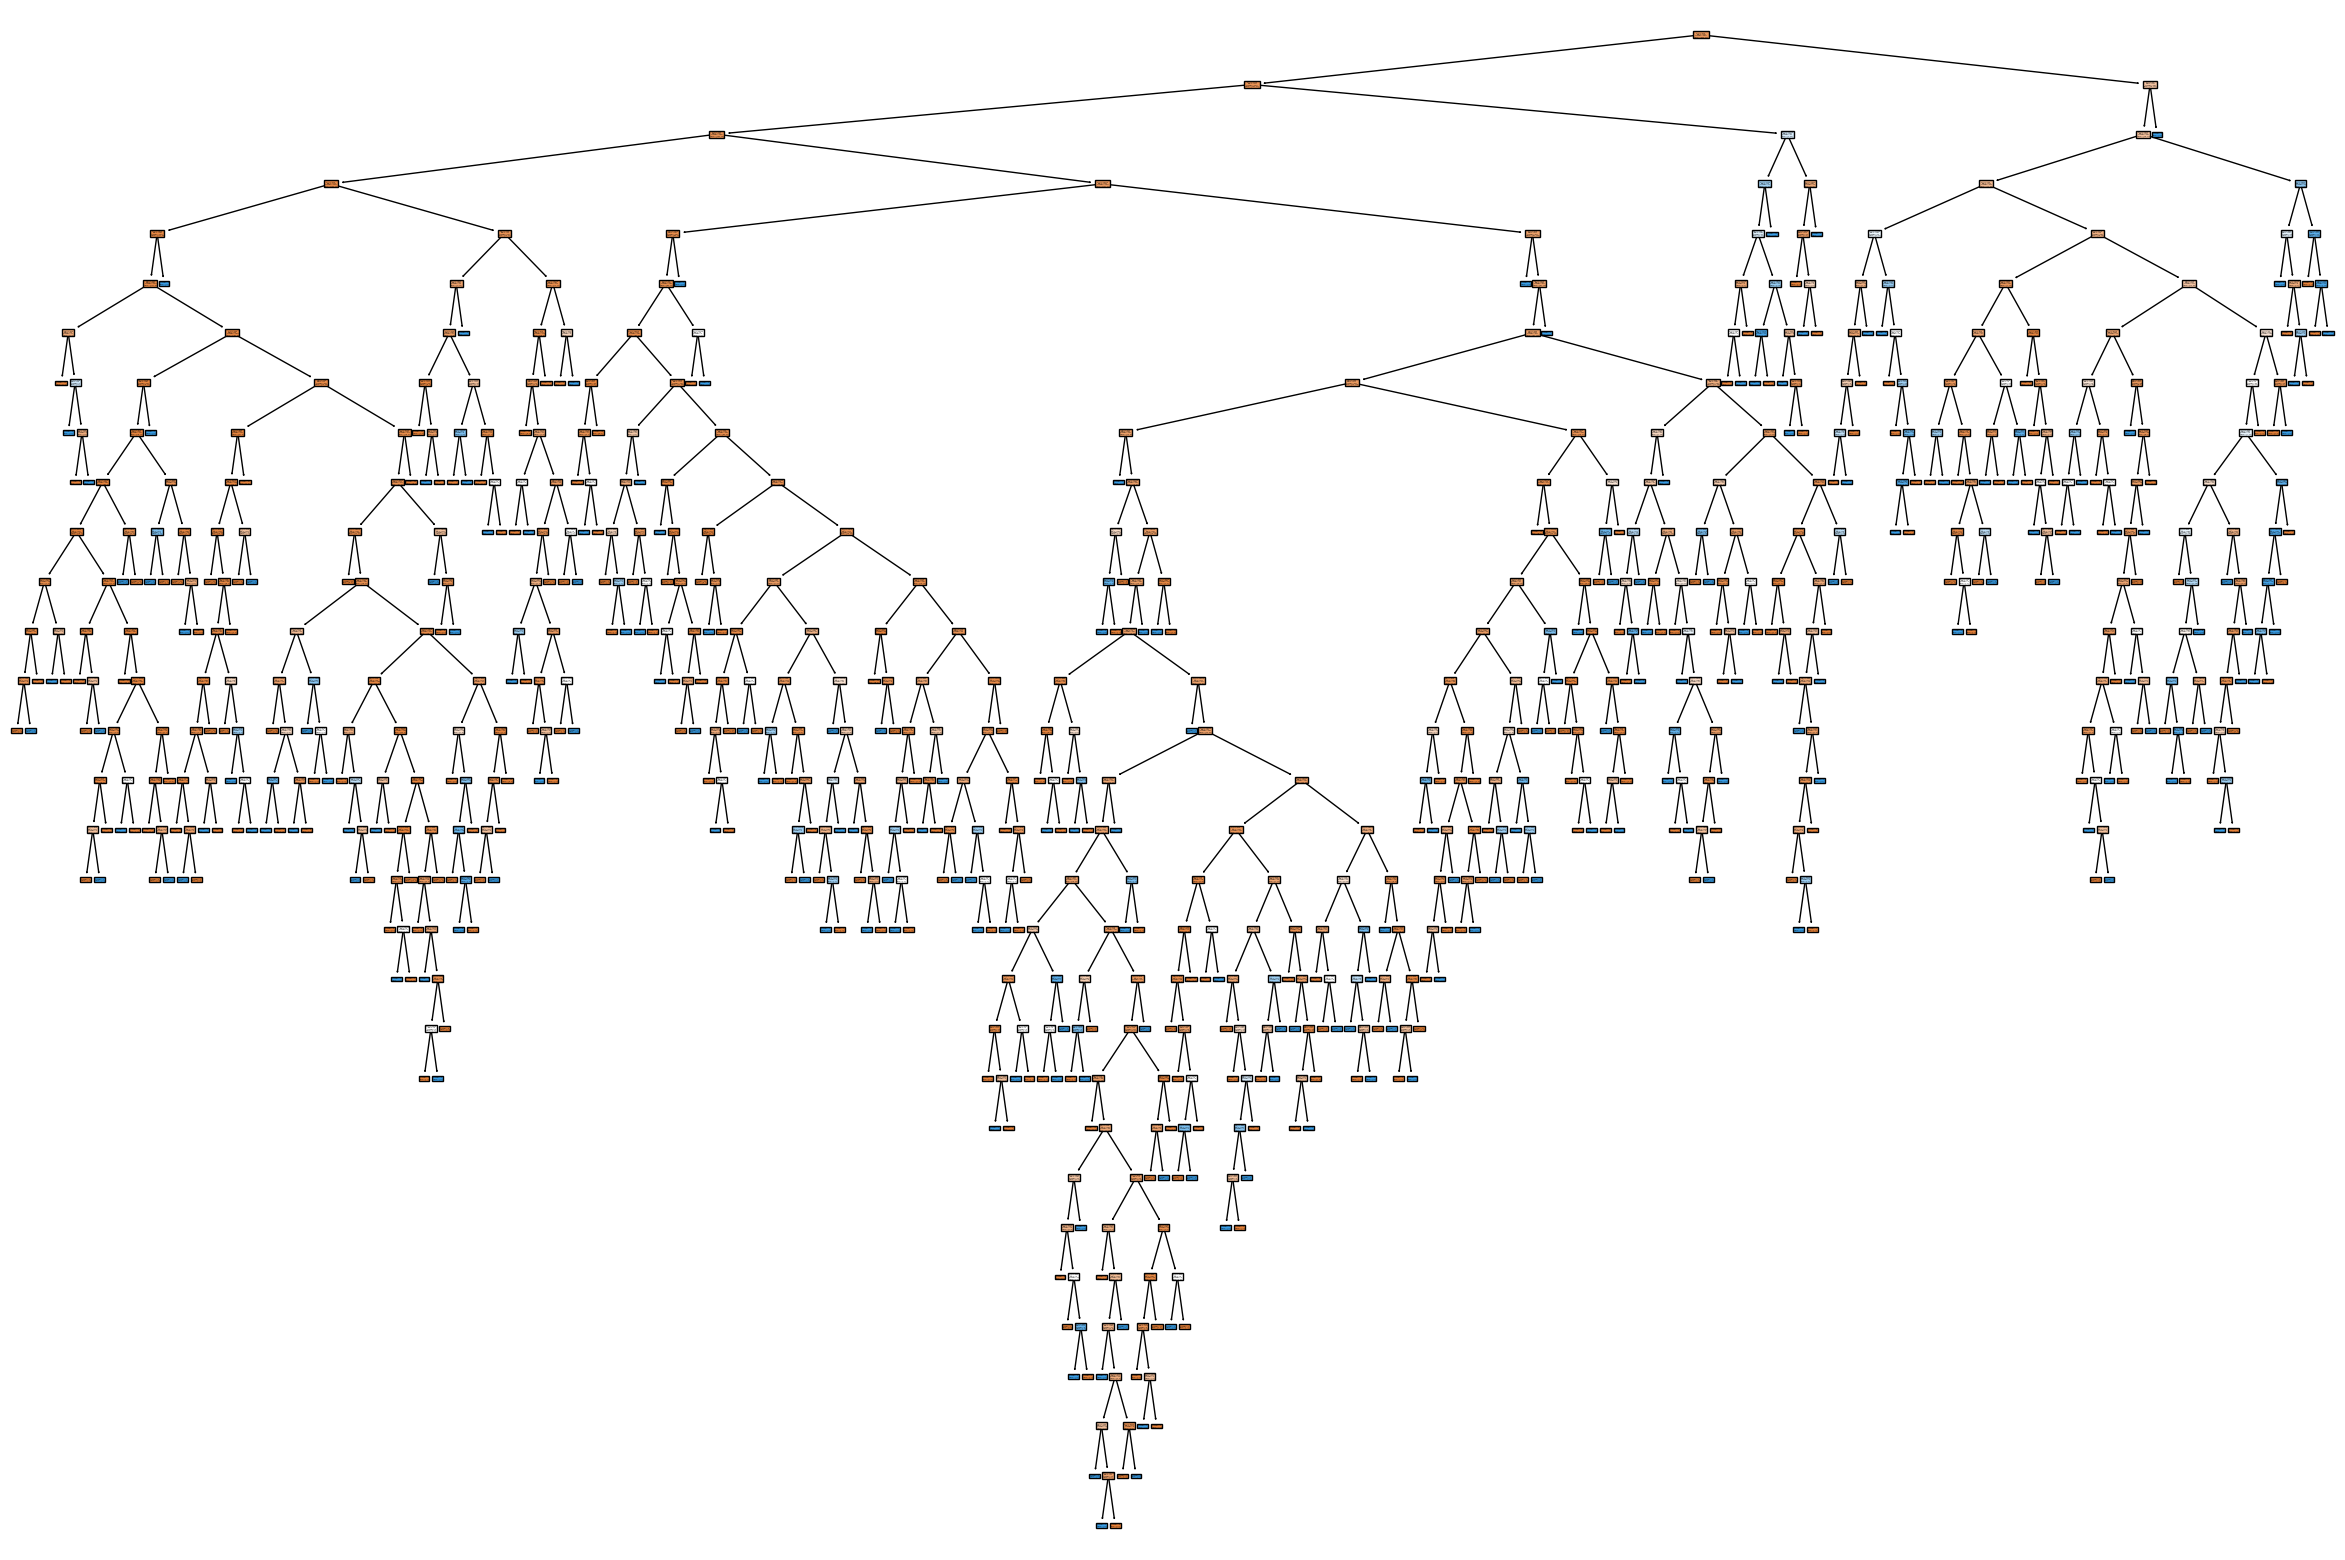

In [121]:
plt.figure(figsize=(30,20))
plot_tree(tree, filled=True)
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       726
           1       0.87      0.63      0.73       124

    accuracy                           0.93       850
   macro avg       0.90      0.81      0.84       850
weighted avg       0.93      0.93      0.93       850

Model accuracy:  0.9317647058823529


<Axes: >

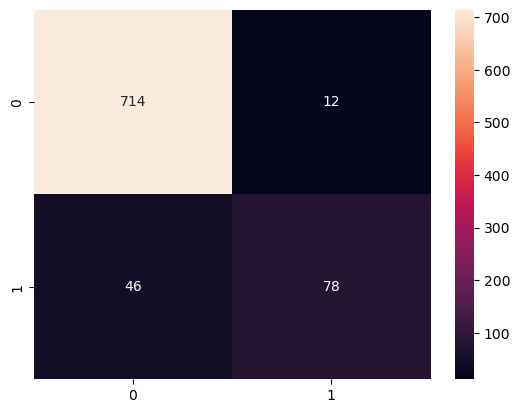

In [123]:
# Random Forest
# Create model (training)
rfors = RandomForestClassifier()
rfors.fit(x_train,y_train)

# Evaluate model
y_pred = rfors.predict(x_test)
print(classification_report(y_test, y_pred))
print("Model accuracy: ", accuracy_score(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       726
           1       0.00      0.00      0.00       124

    accuracy                           0.85       850
   macro avg       0.43      0.50      0.46       850
weighted avg       0.73      0.85      0.79       850

Model accuracy:  0.8541176470588235


C:\Users\Mirsaid\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mirsaid\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mirsaid\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

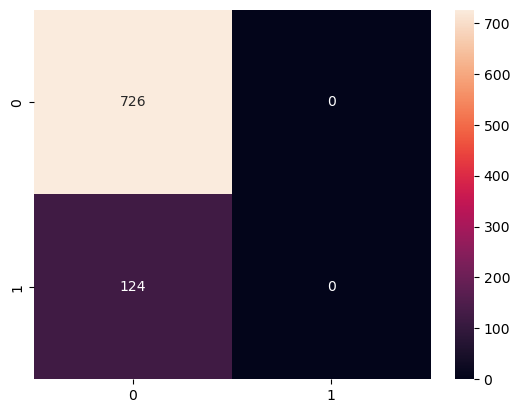

In [125]:
# Support Vector Machines
# Create model (training)
svcmod = SVC()
svcmod.fit(x_train,y_train)

# Evaluate model
y_pred = svcmod.predict(x_test)
print(classification_report(y_test, y_pred))
print("Model accuracy: ", accuracy_score(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
